<hr>

# 🤖 05 - MACHINE LEARNING 🤖

<style>
h1 {
    text-align: center;
    color: hotpink;
    font-weight: bold;
}
</style>

<style>
h2 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h3 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<style>
h4 {
    text-align: center;
    color: black;
    font-weight: bold;
}
</style>

<hr>

## Read the preprocessed data

In [376]:
import pandas as pd
import numpy as np

In [377]:
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")   
y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

In [378]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9864, 74)
(2466, 74)
(9864, 1)
(2466, 1)


In [379]:
X_train.head()


,admin,admin_duration,info,info_duration,prod_related,prod_related_duration,bounce_rate,exit_rate,page_value,special_day,...,traffic_type_11,traffic_type_12,traffic_type_13,traffic_type_14,traffic_type_15,traffic_type_16,traffic_type_17,traffic_type_18,traffic_type_19,traffic_type_20
0,0,0.0,0,0.0,7,95.000000,0.014286,0.061905,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,14.0,0,0.0,81,1441.910588,0.002469,0.013933,2.769599,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,49.2,4,379.0,5,74.600000,0.000000,0.018182,8.326728,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,1,5.0,9,279.000000,0.040000,0.041667,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [380]:
y_train.head()

,revenue
0,False
1,False
2,False
3,False
4,False


## Scaling the data


In [381]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [382]:
scaler = MinMaxScaler()
scaler.fit(X_train) #only fit on the train set to avoid data leakage!
X_train_scaled_minmax = scaler.transform(X_train) 
X_test_scaled_minmax = scaler.transform(X_test)

In [383]:
scaler = StandardScaler()
scaler.fit(X_train) #only fit on the train set to avoid data leakage!
X_train_scaled_standard = scaler.transform(X_train) 
X_test_scaled_standard = scaler.transform(X_test)

## KNN model

In [384]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [385]:
# fitting data on the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.values.ravel())

#score the model
print(knn.score(X_test, y_test.values.ravel()))

0.8446877534468775


In [386]:
# Classification report

y_pred = knn.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       False       0.87      0.95      0.91      2055
        True       0.56      0.30      0.39       411

    accuracy                           0.84      2466
   macro avg       0.72      0.63      0.65      2466
weighted avg       0.82      0.84      0.82      2466



In [387]:
# Confusion matrix 
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[1960   95]
 [ 288  123]]


##### Fitting on scaled data - MinMaxScaler

In [388]:
# fitting MinMax scaled data on the scaled data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled_minmax, y_train.values.ravel())

#score the model
print(knn.score(X_test_scaled_minmax, y_test.values.ravel()))

0.8175182481751825


In [389]:
# Classification report MinMaxScaled

y_pred_scaled = knn.predict(X_test_scaled_minmax)
print(classification_report(y_true=y_test, y_pred=y_pred_scaled))

              precision    recall  f1-score   support

       False       0.85      0.94      0.90      2055
        True       0.40      0.20      0.27       411

    accuracy                           0.82      2466
   macro avg       0.63      0.57      0.58      2466
weighted avg       0.78      0.82      0.79      2466



In [390]:
# Confusion matrix MinMaxScaled

print(confusion_matrix(y_true=y_test, y_pred=y_pred_scaled))

[[1934  121]
 [ 329   82]]


##### Fitting on scaled data - StandardScaler

In [391]:
# fitting Standard scaled data on the scaled data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled_standard, y_train.values.ravel())

#score the model
print(knn.score(X_test_scaled_standard, y_test.values.ravel()))

0.8317112733171127


In [392]:
# Classification report StandardScaled

y_pred_scaled_standart = knn.predict(X_test_scaled_standard)
print(classification_report(y_true=y_test, y_pred=y_pred_scaled_standart))

              precision    recall  f1-score   support

       False       0.86      0.96      0.90      2055
        True       0.49      0.21      0.30       411

    accuracy                           0.83      2466
   macro avg       0.67      0.58      0.60      2466
weighted avg       0.80      0.83      0.80      2466



In [393]:
# Confusion matrix StandardScaled

print(confusion_matrix(y_true=y_test, y_pred=y_pred_scaled_standart))

[[1963   92]
 [ 323   88]]


#### ROC-AUC & PR-AUC

In [394]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, roc_curve, average_precision_score
import matplotlib.pyplot as plt

ROC-AUC Score: 0.4855


c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


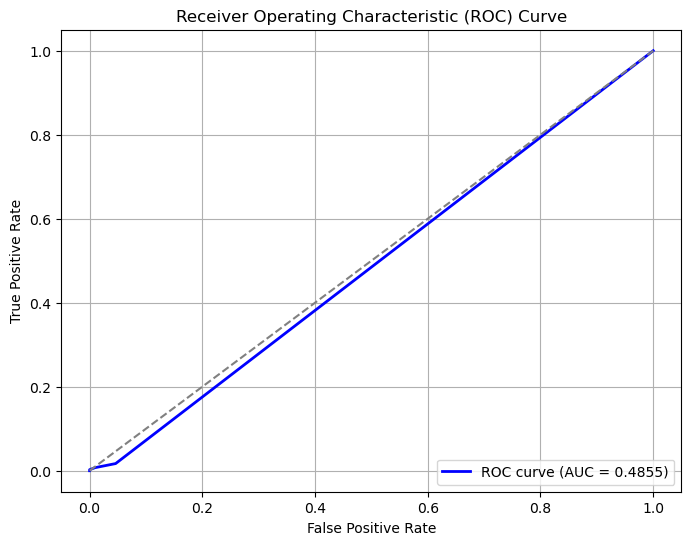

In [395]:
# Get the predicted probabilities for the positive class (class 1)
y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


PR AUC Score: 0.1676


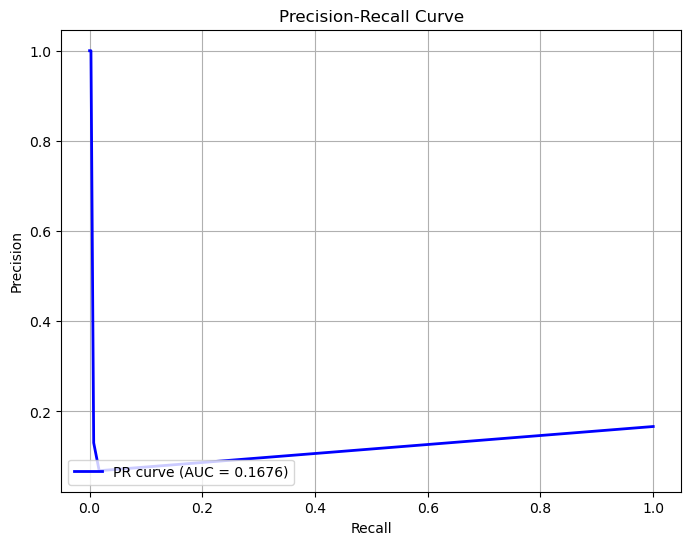

In [396]:
# Get the predicted probabilities for the positive class (class 1)
y_prob = knn.predict_proba(X_test)[:, 1]

# Calculate the Precision-Recall AUC score
pr_auc = average_precision_score(y_test, y_prob)
print(f"PR AUC Score: {pr_auc:.4f}")

# Calculate Precision, Recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

## Logistic regression

In [397]:
from sklearn.linear_model import LogisticRegression

In [398]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)



c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [399]:
# Classification report

y_pred_lr = lr.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_pred_lr))

              precision    recall  f1-score   support

       False       0.94      0.90      0.92      2055
        True       0.60      0.73      0.66       411

    accuracy                           0.87      2466
   macro avg       0.77      0.81      0.79      2466
weighted avg       0.89      0.87      0.88      2466



In [400]:
# Confusion matrix 
print(confusion_matrix(y_true=y_test, y_pred=y_pred_lr))

[[1856  199]
 [ 113  298]]


##### Checking Treshold

In [401]:
prob_threshold = 0.7
y_pred_manual = lr.predict_proba(X_test)[:, -1] >= prob_threshold
print(classification_report(y_true=y_test, y_pred=y_pred_manual))

              precision    recall  f1-score   support

       False       0.92      0.94      0.93      2055
        True       0.67      0.56      0.61       411

    accuracy                           0.88      2466
   macro avg       0.79      0.75      0.77      2466
weighted avg       0.87      0.88      0.88      2466



##### Fitting on scaled data - MinMaxScaler

In [402]:
# fitting MinMax scaled data on the scaled data
lr = LogisticRegression(class_weight='balanced') # for the imbalanced data to give more weight for the minority class
lr.fit(X_train_scaled_minmax, y_train.values.ravel())

#score the model
print(lr.score(X_test_scaled_minmax, y_test.values.ravel()))


0.818734793187348


In [403]:
# Classification report MinMaxScaled

y_pred_scaled = lr.predict(X_test_scaled_minmax)
print(classification_report(y_true=y_test, y_pred=y_pred_scaled))

              precision    recall  f1-score   support

       False       0.94      0.83      0.88      2055
        True       0.47      0.75      0.58       411

    accuracy                           0.82      2466
   macro avg       0.71      0.79      0.73      2466
weighted avg       0.87      0.82      0.83      2466



In [404]:
# Confusion matrix MinMaxScaled

print(confusion_matrix(y_true=y_test, y_pred=y_pred_scaled))

[[1710  345]
 [ 102  309]]


##### Fitting on scaled data - StandardScaler

In [405]:
# fitting MinMax scaled data on the scaled data
lr = LogisticRegression(class_weight='balanced') # for the imbalanced data to give more weight for the minority class
lr.fit(X_train_scaled_standard, y_train.values.ravel())

#score the model
print(lr.score(X_test_scaled_standard, y_test.values.ravel()))

0.8544201135442011


In [406]:
# Classification report StandardScaled

y_pred_scaled_standart = lr.predict(X_test_scaled_standard)
print(classification_report(y_true=y_test, y_pred=y_pred_scaled_standart))

              precision    recall  f1-score   support

       False       0.95      0.87      0.91      2055
        True       0.55      0.76      0.63       411

    accuracy                           0.85      2466
   macro avg       0.75      0.82      0.77      2466
weighted avg       0.88      0.85      0.86      2466



In [407]:
# Confusion matrix StandardScaled

print(confusion_matrix(y_true=y_test, y_pred=y_pred_scaled_standart))

[[1796  259]
 [ 100  311]]


## Random Forest

### Random Forest model

In [408]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [409]:
forest = RandomForestClassifier(random_state=42, n_estimators=100,
                             max_depth=20)

In [410]:
forest.fit(X_train, y_train)

c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=20, random_state=42)

In [411]:
pred = forest.predict(X_test)

# RMSE
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)


print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", rmse)
print("R2 score", forest.score(X_test, y_test))

MAE 0.10786699107866991
RMSE 0.32843110552849575
R2 score 0.8921330089213301


In [412]:
# Classification report

y_pred_forest = forest.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_pred_forest))

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      2055
        True       0.77      0.51      0.61       411

    accuracy                           0.89      2466
   macro avg       0.84      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466



In [413]:
# Confusion matrix 
print(confusion_matrix(y_true=y_test, y_pred=y_pred_forest))

[[1992   63]
 [ 203  208]]


### Fittind on scaled data - MinMaxScaler

In [414]:
forest.fit(X_train_scaled_minmax, y_train)

c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=20, random_state=42)

In [415]:
pred = forest.predict(X_test_scaled_minmax)

# RMSE
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)


print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", rmse)
print("R2 score", forest.score(X_test_scaled_minmax, y_test))

MAE 0.10867802108678021
RMSE 0.32966349674597006
R2 score 0.8913219789132197


In [416]:
# Classification report

y_pred_forest_minmax = forest.predict(X_test_scaled_minmax)

print(classification_report(y_true=y_test, y_pred=y_pred_forest_minmax))

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      2055
        True       0.76      0.50      0.61       411

    accuracy                           0.89      2466
   macro avg       0.84      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466



In [417]:
# Confusion matrix 
print(confusion_matrix(y_true=y_test, y_pred=y_pred_forest_minmax))

[[1991   64]
 [ 204  207]]


### Fittind on scaled data - StandardScaler

In [418]:
forest.fit(X_train_scaled_standard, y_train)

c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=20, random_state=42)

In [419]:
pred = forest.predict(X_test_scaled_standard)

# RMSE
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)


print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", rmse)
print("R2 score", forest.score(X_test_scaled_standard, y_test))

MAE 0.10746147607461476
RMSE 0.3278131725154051
R2 score 0.8925385239253852


In [420]:
# Classification report

y_pred_forest_standard = forest.predict(X_test_scaled_standard)

print(classification_report(y_true=y_test, y_pred=y_pred_forest_standard))

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      2055
        True       0.77      0.51      0.61       411

    accuracy                           0.89      2466
   macro avg       0.84      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466



In [421]:
# Confusion matrix 
print(confusion_matrix(y_true=y_test, y_pred=y_pred_forest_standard))

[[1993   62]
 [ 203  208]]


## Decision Tree

### Read the preprocessed data

In [422]:
import pandas as pd
import numpy as np

In [423]:
X_train = pd.read_csv("../data/processed/X_train.csv")
X_test = pd.read_csv("../data/processed/X_test.csv")   
y_train = pd.read_csv("../data/processed/y_train.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

In [424]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9864, 74)
(2466, 74)
(9864, 1)
(2466, 1)


In [425]:
X_train.head()


,admin,admin_duration,info,info_duration,prod_related,prod_related_duration,bounce_rate,exit_rate,page_value,special_day,...,traffic_type_11,traffic_type_12,traffic_type_13,traffic_type_14,traffic_type_15,traffic_type_16,traffic_type_17,traffic_type_18,traffic_type_19,traffic_type_20
0,0,0.0,0,0.0,7,95.000000,0.014286,0.061905,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,14.0,0,0.0,81,1441.910588,0.002469,0.013933,2.769599,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,49.2,4,379.0,5,74.600000,0.000000,0.018182,8.326728,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,1,5.0,9,279.000000,0.040000,0.041667,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [426]:
y_train.head()

,revenue
0,False
1,False
2,False
3,False
4,False


### Scaling the data


In [427]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [428]:
scaler = MinMaxScaler()
scaler.fit(X_train) #only fit on the train set to avoid data leakage!
X_train_scaled_minmax = scaler.transform(X_train) 
X_test_scaled_minmax = scaler.transform(X_test)

In [429]:
scaler = StandardScaler()
scaler.fit(X_train) #only fit on the train set to avoid data leakage!
X_train_scaled_standard = scaler.transform(X_train) 
X_test_scaled_standard = scaler.transform(X_test)

### Decision Tree model

In [430]:
from sklearn.tree import DecisionTreeClassifier

In [431]:
tree = DecisionTreeClassifier(random_state=42, max_depth=10)

In [432]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [433]:
pred = tree.predict(X_test)

# RMSE
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)


print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", rmse)
print("R2 score", tree.score(X_test, y_test))

MAE 0.12489862124898621
RMSE 0.35340999030727216
R2 score 0.8751013787510138


In [434]:
# Classification report

y_pred_tree = tree.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_pred_tree))

              precision    recall  f1-score   support

       False       0.91      0.94      0.93      2055
        True       0.64      0.56      0.60       411

    accuracy                           0.88      2466
   macro avg       0.78      0.75      0.76      2466
weighted avg       0.87      0.88      0.87      2466



In [435]:
# Confusion matrix 
print(confusion_matrix(y_true=y_test, y_pred=y_pred_tree))

[[1928  127]
 [ 181  230]]


### Fittind on scaled data - MinMaxScaler

In [436]:
tree.fit(X_train_scaled_minmax, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [437]:
pred = tree.predict(X_test_scaled_minmax)

# RMSE
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)


print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", rmse)
print("R2 score", tree.score(X_test_scaled_minmax, y_test))

MAE 0.12489862124898621
RMSE 0.35340999030727216
R2 score 0.8751013787510138


In [438]:
# Classification report

y_pred_tree_minmax = tree.predict(X_test_scaled_minmax)

print(classification_report(y_true=y_test, y_pred=y_pred_tree_minmax))

              precision    recall  f1-score   support

       False       0.91      0.94      0.93      2055
        True       0.64      0.56      0.60       411

    accuracy                           0.88      2466
   macro avg       0.78      0.75      0.76      2466
weighted avg       0.87      0.88      0.87      2466



In [439]:
# Confusion matrix 
print(confusion_matrix(y_true=y_test, y_pred=y_pred_tree_minmax))

[[1928  127]
 [ 181  230]]


### Fittind on scaled data - StandardScaler

In [440]:
tree.fit(X_train_scaled_standard, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [441]:
pred = tree.predict(X_test_scaled_standard)

# RMSE
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)


print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", rmse)
print("R2 score", tree.score(X_test_scaled_standard, y_test))

MAE 0.12489862124898621
RMSE 0.35340999030727216
R2 score 0.8751013787510138


In [442]:
# Classification report

y_pred_tree_standard = tree.predict(X_test_scaled_standard)

print(classification_report(y_true=y_test, y_pred=y_pred_tree_standard))

              precision    recall  f1-score   support

       False       0.91      0.94      0.93      2055
        True       0.64      0.56      0.60       411

    accuracy                           0.88      2466
   macro avg       0.78      0.75      0.76      2466
weighted avg       0.87      0.88      0.87      2466



In [443]:
# Confusion matrix 
print(confusion_matrix(y_true=y_test, y_pred=y_pred_tree_standard))

[[1928  127]
 [ 181  230]]


## Ada Boost

In [444]:
from sklearn.ensemble import AdaBoostClassifier

In [445]:
ada_class = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                            n_estimators=100)

In [446]:
ada_class.fit(X_train, y_train)

c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                   n_estimators=100)

In [447]:
pred = ada_class.predict(X_test)

# RMSE
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)


print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", rmse)
print("R2 score", ada_class.score(X_test, y_test))

MAE 0.11070559610705596
RMSE 0.33272450481901084
R2 score 0.889294403892944


In [448]:
# Classification report

y_pred_ada = ada_class.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_pred_ada))

              precision    recall  f1-score   support

       False       0.90      0.97      0.94      2055
        True       0.77      0.47      0.59       411

    accuracy                           0.89      2466
   macro avg       0.84      0.72      0.76      2466
weighted avg       0.88      0.89      0.88      2466



In [449]:
# Confusion matrix 
print(confusion_matrix(y_true=y_test, y_pred=y_pred_ada))

[[1998   57]
 [ 216  195]]


### Fittind on scaled data - MinMaxScaler

In [450]:
ada_class.fit(X_train_scaled_minmax, y_train)

c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                   n_estimators=100)

In [451]:
pred = ada_class.predict(X_test_scaled_minmax)

# RMSE
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)


print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", rmse)
print("R2 score", ada_class.score(X_test_scaled_minmax, y_test))

MAE 0.10827250608272507
RMSE 0.3290478781009309
R2 score 0.8917274939172749


In [452]:
# Classification report

y_pred_ada_minmax = ada_class.predict(X_test_scaled_minmax)

print(classification_report(y_true=y_test, y_pred=y_pred_ada_minmax))

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      2055
        True       0.77      0.50      0.61       411

    accuracy                           0.89      2466
   macro avg       0.84      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466



In [453]:
# Confusion matrix 
print(confusion_matrix(y_true=y_test, y_pred=y_pred_ada_minmax))

[[1992   63]
 [ 204  207]]


### Fittind on scaled data - StandardScaler

In [454]:
ada_class.fit(X_train_scaled_standard, y_train)

c:\Users\Anna\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                   n_estimators=100)

In [455]:
pred = ada_class.predict(X_test_scaled_standard)

# RMSE
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)


print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", rmse)
print("R2 score", ada_class.score(X_test_scaled_standard, y_test))

MAE 0.11476074614760746
RMSE 0.33876355492822346
R2 score 0.8852392538523925


In [456]:
# Classification report

y_pred_ada_standard = ada_class.predict(X_test_scaled_standard)

print(classification_report(y_true=y_test, y_pred=y_pred_ada_standard))

              precision    recall  f1-score   support

       False       0.90      0.97      0.93      2055
        True       0.74      0.48      0.58       411

    accuracy                           0.89      2466
   macro avg       0.82      0.72      0.76      2466
weighted avg       0.88      0.89      0.87      2466



In [457]:
# Confusion matrix 
print(confusion_matrix(y_true=y_test, y_pred=y_pred_ada_standard))

[[1987   68]
 [ 215  196]]


## XGBoost

In [458]:
!pip install xgboost

In [459]:
import xgboost as xgb

In [460]:
xgb = xgb.XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)

In [461]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [462]:
pred = xgb.predict(X_test)

# RMSE
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)


print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", rmse)
print("R2 score", xgb.score(X_test, y_test))

MAE 0.10259529602595296
RMSE 0.32030500468452405
R2 score 0.897404703974047


In [463]:
# Classification report

y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_pred_xgb))

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2055
        True       0.74      0.60      0.66       411

    accuracy                           0.90      2466
   macro avg       0.83      0.78      0.80      2466
weighted avg       0.89      0.90      0.89      2466



In [464]:
# Confusion matrix 
print(confusion_matrix(y_true=y_test, y_pred=y_pred_xgb))

[[1967   88]
 [ 165  246]]


### Fittind on scaled data - MinMaxScaler

In [465]:
xgb.fit(X_train_scaled_minmax, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [466]:
pred = xgb.predict(X_test_scaled_minmax)

# RMSE
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)


print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", rmse)
print("R2 score", xgb.score(X_test_scaled_minmax, y_test))

MAE 0.10259529602595296
RMSE 0.32030500468452405
R2 score 0.897404703974047


In [467]:
# Classification report

y_pred_xgb_minmax = xgb.predict(X_test_scaled_minmax)

print(classification_report(y_true=y_test, y_pred=y_pred_xgb_minmax))

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2055
        True       0.74      0.60      0.66       411

    accuracy                           0.90      2466
   macro avg       0.83      0.78      0.80      2466
weighted avg       0.89      0.90      0.89      2466



In [468]:
# Confusion matrix 
print(confusion_matrix(y_true=y_test, y_pred=y_pred_xgb_minmax))

[[1967   88]
 [ 165  246]]


### Fittind on scaled data - StandardScaler

In [469]:
xgb.fit(X_train_scaled_standard, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [470]:
pred = xgb.predict(X_test_scaled_standard)

# RMSE
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)


print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", rmse)
print("R2 score", xgb.score(X_test_scaled_standard, y_test))

MAE 0.10259529602595296
RMSE 0.32030500468452405
R2 score 0.897404703974047


In [471]:
# Classification report

y_pred_xgb_standard = xgb.predict(X_test_scaled_standard)

print(classification_report(y_true=y_test, y_pred=y_pred_xgb_standard))

              precision    recall  f1-score   support

       False       0.92      0.96      0.94      2055
        True       0.74      0.60      0.66       411

    accuracy                           0.90      2466
   macro avg       0.83      0.78      0.80      2466
weighted avg       0.89      0.90      0.89      2466



In [472]:
# Confusion matrix 
print(confusion_matrix(y_true=y_test, y_pred=y_pred_xgb_standard))

[[1967   88]
 [ 165  246]]
